In [64]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:

df = pd.read_csv(r'C:\Users\sarac\Downloads\diabetes.csv', na_values=['NULL', '?', 'NONE', ''])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [66]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


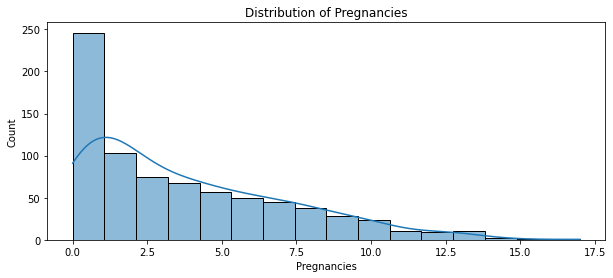

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each column in df
for column in df:
    plt.figure(figsize=(10,4))
    sns.histplot(df[column], kde=True)  # set kde=False if you don't want the density curve
    plt.title(f'Distribution of {column}')
    plt.show()


In [ ]:
corr = df.corr()
plt.figure(figsize=(15,15))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True,)

In [ ]:
top_features = corr.index[corr['Outcome']>0.2]
plt.subplots(figsize=(10,5))
top_corr = df[top_features].corr()
sns.heatmap(top_corr, annot=True)

In [ ]:
X = df.drop(['BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Outcome'], axis = 1)
Y = df['Outcome']

print('X shape: {}'.format(X.shape))
print('Y shape: {}'.format(Y.shape))

In [ ]:
y = Y.replace({0:'Does not have diabetes', 1:'Has Diabetes'})
y

In [ ]:
X.describe().round(2)

In [ ]:
y.value_counts()

In [ ]:
from sklearn.model_selection import train_test_split

print("Partitioning Data...")
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)
print("Data Successfully Partitioned!")

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

print("Training Model...")
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
print("Model Trained Successfully!")

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("------------Training Prediction--------------")
y_preds = dt_model.predict(X_train)
print(f"Classification Report:\n\n{classification_report(y_train, y_preds)}\n\n")
    

print("------------Test Prediction--------------")
dt_model.fit(X_test, y_test)
y_preds = dt_model.predict(X_test)
print(f"Classification Report:\n\n{classification_report(y_test, y_preds)}\n\n")

In [ ]:
import pickle
# Open a file and use dump() 
with open('file_diabetes.pkl', 'wb') as file: 
      
    # A new file will be created 
    pickle.dump(dt_model, file)